In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# to avoid the plt show
%matplotlib inline

In [2]:
boston_df=pd.read_csv('Dataset\HousingData.csv')

In [3]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# Checking for missing values
boston_df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
# Fillup the missing values
boston_df.fillna(0, inplace=True)

In [8]:
# renaming the MEDV column to PRICE
boston_df.rename(columns={'MEDV':'Price'},inplace=True)

EDA part 

In [9]:
# checking the correlation between the features
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.185559,0.379772,-0.055713,0.410918,-0.220340,0.328997,-0.365901,0.600505,0.559880,0.278243,-0.364886,0.411330,-0.384120
ZN,-0.185559,1.000000,-0.482670,-0.032992,-0.498619,0.312295,-0.470146,0.632428,-0.300061,-0.304385,-0.394622,0.170125,-0.361012,0.362292
INDUS,0.379772,-0.482670,1.000000,0.055833,0.690250,-0.339054,0.488737,-0.662476,0.564867,0.687468,0.372852,-0.341514,0.492359,-0.441371
CHAS,-0.055713,-0.032992,0.055833,1.000000,0.070867,0.106797,0.054485,-0.092318,-0.003339,-0.035822,-0.109451,0.050608,-0.040427,0.183844
NOX,0.410918,-0.498619,0.690250,0.070867,1.000000,-0.302188,0.627476,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.549209,-0.427321
RM,-0.220340,0.312295,-0.339054,0.106797,-0.302188,1.000000,-0.227535,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.584754,0.695360
AGE,0.328997,-0.470146,0.488737,0.054485,0.627476,-0.227535,1.000000,-0.641898,0.420382,0.459859,0.239508,-0.214615,0.503452,-0.356699
DIS,-0.365901,0.632428,-0.662476,-0.092318,-0.769230,0.205246,-0.641898,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.456922,0.249929
RAD,0.600505,-0.300061,0.564867,-0.003339,0.611441,-0.209847,0.420382,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.438134,-0.381626
TAX,0.559880,-0.304385,0.687468,-0.035822,0.668023,-0.292048,0.459859,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.494026,-0.468536


In [ ]:
#sns.pairplot(boston_df)

Text(0.5, 1.0, 'CRIM vs Price')

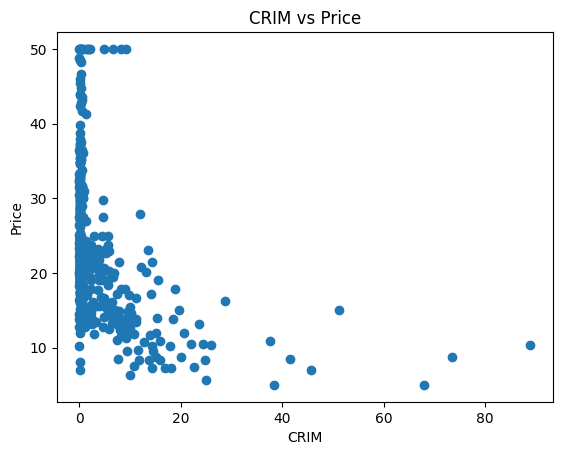

In [11]:
plt.scatter(boston_df['CRIM'],boston_df['Price'])
plt.xlabel('CRIM')
plt.ylabel('Price')
plt.title('CRIM vs Price')

Text(0.5, 1.0, 'CRIM vs Price')

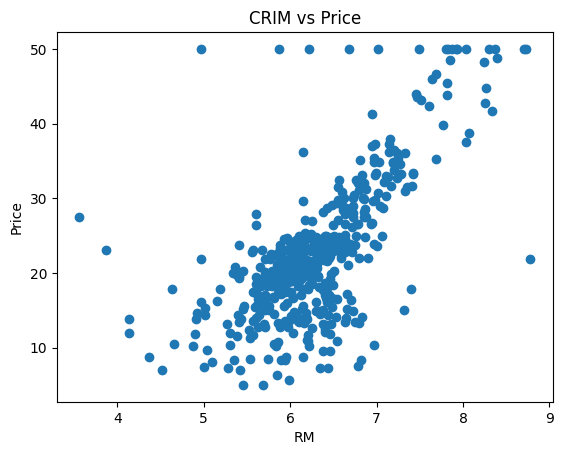

In [12]:
plt.scatter(boston_df['RM'],boston_df['Price'])
plt.xlabel('RM')
plt.ylabel('Price')
plt.title('CRIM vs Price')

<Axes: xlabel='RM', ylabel='Price'>

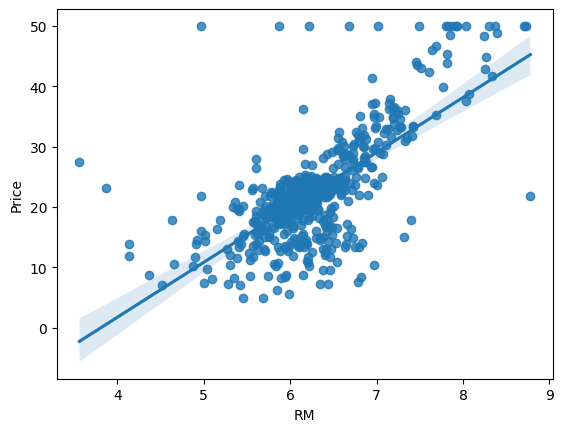

In [13]:
# as the RM have a positive correlation with the Price, we can use the regplot to see the linear regression line
sns.regplot(x='RM',y='Price',data=boston_df)

<Axes: xlabel='LSTAT', ylabel='Price'>

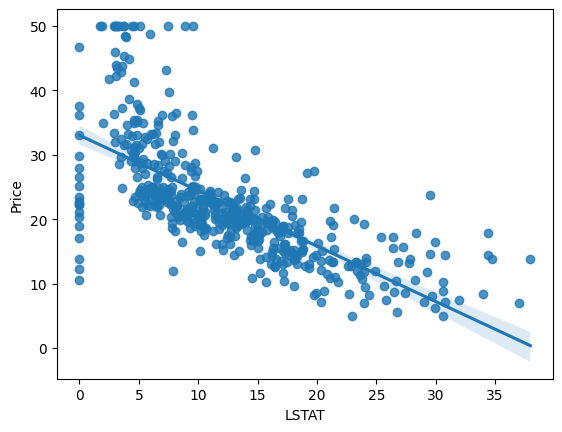

In [14]:
# simlarly for the LSTAT
sns.regplot(x='LSTAT',y='Price',data=boston_df)


In [15]:
# divivding the data into independent and dependent variables
X=boston_df.iloc[:,:-1]
y=boston_df.iloc[:,-1]

In [16]:
# now Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


In [17]:
# now before applying the model, we need to scale the data
# we need do the standardization of the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)# we are not fitting the test data, as we have already fitted the train data

In [18]:
X_train.shape

(379, 13)

In [19]:
X_test.shape

(127, 13)

We need the pickle file of the scalar (as scalar has been trained for standardization of x-train and test data)

In [20]:
import pickle  
pickle.dump(sc, open('scaler_standardization.pkl', 'wb'))

Model Training using Regression Model 

In [21]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [22]:
regression.fit(X_train,y_train)

LinearRegression()

In [23]:
print(regression.coef_)

[-1.07918507  0.61898163 -0.16559533  0.87308663 -1.96037445  3.49988962
 -0.7399372  -3.10392939  1.81636685 -1.36098729 -2.1627215   1.12012337
 -2.8026764 ]


In [24]:
print(regression.intercept_)

22.90791556728232


In [25]:
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [26]:
regression.score(X_train,y_train)

0.7342386356345362

In [27]:
prediction=regression.predict(X_test)

Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

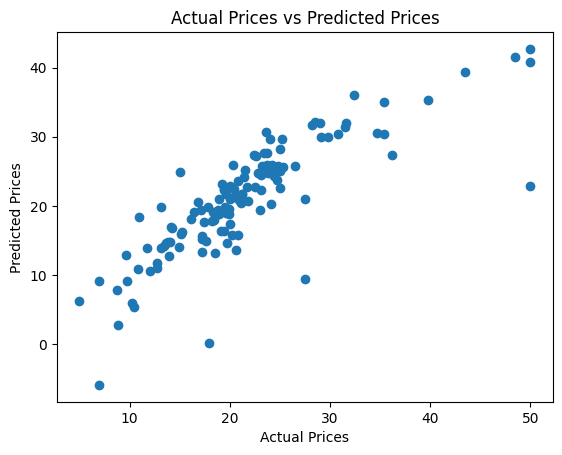

In [28]:
# now ploting the scatter plot between the actual and predicted values
plt.scatter(y_test,prediction,)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')

C:\Users\Admin\AppData\Local\Temp\ipykernel_14380\2022314539.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)  # kde is kernel density estimation
d:\Python_Install\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

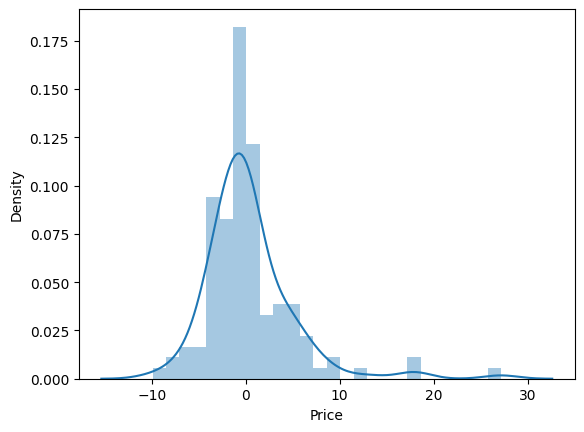

In [29]:
# prediction of the residual 
residuals=y_test-prediction
sns.distplot(residuals)  # kde is kernel density estimation

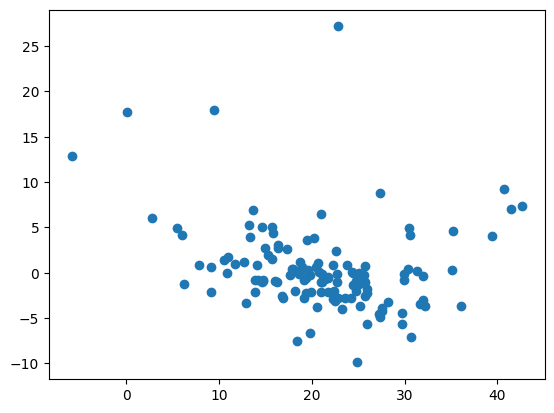

In [30]:
# prediction of the residual and predictions
# if the residuals are randomly scattered around 
# the horizontal axis, then the model is good
plt.scatter(prediction,residuals)


Performace Matrices

In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('Mean Absolute Error:',mean_absolute_error(y_test,prediction))
print('Mean Squared Error:',mean_squared_error(y_test,prediction))
print('R2 Score:',r2_score(y_test,prediction))

Mean Absolute Error: 3.02827776827232
Mean Squared Error: 23.008721077631737
R2 Score: 0.6714313925008555


In [32]:
# r square and adjusted r square
# r square is the proportion of the variance in the dependent variable that is predictable from the independent variable
print('R2 Score:',r2_score(y_test,prediction))

R2 Score: 0.6714313925008555


In [33]:
# now adjested r square
# adj r square is the modified version of r square that has been adjusted for the number of predictors in the model
# adj r square is always less than r square
1-(1-r2_score(y_test,prediction))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6336314642044937

New data Predictions

In [34]:
# how we can get the ouptput for the new datapoints 
# we have to apply the transform method on the new data points
new_data=[[0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98]]

In [ ]:
boston_df.head()_

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,0.00,36.2


In [45]:
# new data to array
new_data=np.array(new_data)

In [36]:
new_data.shape

(1, 13)

In [37]:
# now apply the transform method
new_data=sc.transform(new_data)

d:\Python_Install\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:
regression.predict(new_data)

array([29.70075315])

Picking the regression model for further deployment part

In [39]:
# saving the model
import pickle


In [40]:
pickle.dump(regression,open('Regression_model.pkl','wb'))

In [41]:
# now loading the pickle file for verification purpose
model=pickle.load(open('Regression_model.pkl','rb'))

In [42]:
model.predict(new_data)

array([29.70075315])